In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [20]:
df = pd.read_csv('pokemon.csv')
poke_df = df[['Attack','Defense','Sp. Atk','Sp. Def','Total']]
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


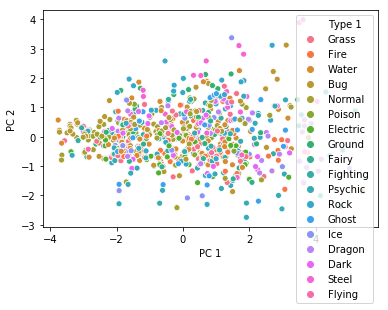

In [21]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
df['PC 1'] = pc[:, 0]
df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=df, 
                x='PC 1', y='PC 2', hue='Type 1')

plt.show()